In [118]:
#What is to be achieved????

#Get International articles --- done
#Get Statewise articles for India --- done
#Get twitter trends --- done


#for international articles - done for australia,canada and us currently
#for statewise articles - done for all states and Union territories

#twitter trends - get for australia,canada and us
#twitter trends - get for india //ignoring for states as trends are mostly the same for each state as for india.

#Process international articles for getting useable hastags
#Process Statewise articles for india to get useable hastags


#Combine list of twitter and article trend
#one wordCloud for international trends
#one wordcloud for indian trends
#one wordcloud for each respective states and UTs
#final wordCloud consisting of all trends



#improvements v2:
#handle special chars -- needs improvement 
#alternate source of truth -- code added
#improve extraction - better
#improve wordcloud -- better
#api added to phrase extraction -- paid 


In [119]:
#necessary libraries

import pprint
import requests
import pandas as pd
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer
import matplotlib.pyplot as plt
from twitter import *
import sys
sys.path.append(".")
import config
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/raghavendra/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/raghavendra/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [120]:
secret='b88ebbaa632c4961984bc611b1b6d916'
secret_alt_1 = 'b7d9851f7a01459fb6e160952e93ebdf'
secret_alt_2='454c7b6933c5427cbf17ef85e4cf1ca7'
secret_alt_3='38c913a811df4a95ad68eae9ca127418'
#topics=['business', 'entertainment', 'general', 'health', 'science', 'sports', 'technology']
country=['us','ca','au']


In [121]:
parameters = {
  
    'pageSize': 30,  # maximum is 100
    'apiKey': secret # your own API key
}

In [122]:
name=[]
category=[]
    
url_sources='https://newsapi.org/v2/sources?'
response = requests.get(url_sources, params=parameters)
response_json = response.json()
df_name=pd.DataFrame()
df_category=pd.DataFrame()

for i in response_json['sources']:
    df_name=df_name.append([i['name']])
    df_category=df_category.append([i['category']])
    df_name.reset_index(drop=True,inplace=True)
df_name=df_name.rename(columns={0:'name'})
name.append(df_name['name'].to_list())
df_category.reset_index(drop=True,inplace=True)
df_category=df_category.rename(columns={0:'category'})
category.append(df_category['category'].to_list())

name = [item for sublist in name for item in sublist]
category = [item for sublist in category for item in sublist]
category_dict = {name[i]: category[i] for i in range(len(name))} 

url_df = pd.DataFrame(list(zip(name, category)),columns =['name', 'category']) 

print("list of websites and category")



url_df.head(7)




list of websites and category


,name,category
0,ABC News,general
1,ABC News (AU),general
2,Aftenposten,general
3,Al Jazeera English,general
4,ANSA.it,general
5,Argaam,business
6,Ars Technica,technology


In [123]:
#can be used to add websites to the master list of news

def website_appender(name,category):    
    global url_df
    li=[name]
    li2=[category]
    names=pd.DataFrame(list(zip(li,li2)),columns=['name','category'])
    url_df=url_df.append(names)
    url_df=url_df.reset_index(drop=True)
    
    
    
website_appender('ESPN India','sports')

url_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      129 non-null    object
 1   category  129 non-null    object
dtypes: object(2)
memory usage: 2.1+ KB


In [124]:
url_df.tail()


,name,category
124,Wired.de,technology
125,Wirtschafts Woche,business
126,Xinhua Net,general
127,Ynet,general
128,ESPN India,sports


In [125]:
#extracts articles based on country codes
def extract(country_code):
    title=[]
    url=[]
    category=[]
    name=[]
    
    url_country='https://newsapi.org/v2/top-headlines?country='+country_code+'&apiKey='+secret
    df_title=pd.DataFrame()
    df_url=pd.DataFrame()
    df_category=pd.DataFrame()
    df_name=pd.DataFrame()
        
    response = requests.get(url_country, params=parameters)

# Convert the response to JSON format and pretty print it
    response_json = response.json()
    for i in response_json['articles']:
        df_title=df_title.append([i['title']])
        df_url=df_url.append([i['url']])
        df_name=df_name.append([i['source']['name']])
        
        #df_category=df_category.append(pd.Series(topic),ignore_index=True)
    df_title.reset_index(drop=True,inplace=True)
    df_title=df_title.rename(columns={0:'Title'})
    title.append(df_title['Title'].to_list())
    df_url.reset_index(drop=True,inplace=True)
    df_url=df_url.rename(columns={0:'url'})
    url.append(df_url['url'].to_list())
    
    df_name=df_name.rename(columns={0:'name'})
    name.append(df_name['name'].to_list())
    

    name = [item for sublist in name for item in sublist]
   # category = [item for sublist in category for item in sublist]
   # df_category.reset_index(drop=True,inplace=True)
    #df_category=df_category.rename(columns={0:'Title'})
    #category.append(df_category['Title'].to_list())
    title = [item for sublist in title for item in sublist]
    url = [item for sublist in url for item in sublist]
    #category = [item for sublist in category for item in sublist]

    
    for item in name:
        if item in category_dict.keys():
            category.append(category_dict[item])
        else:
            category.append('general')
    df = pd.DataFrame(list(zip(title, url,name,category)),columns =['title', 'url','name','category']) 
    df['country']=country_code
    
    
    return df


In [126]:
%%time 
us_df=extract('us')
print("Top 12 US articles")
us_df['title'][0]



Top 12 US articles
CPU times: user 99.7 ms, sys: 3.6 ms, total: 103 ms
Wall time: 1.38 s


'Kanye West Criticizes Harriet Tubman At His Political Rally - HuffPost'

In [127]:
aus_df=extract('au')
print("Top 12 Australia articles")
aus_df.head(12)


Top 12 Australia articles


,title,url,name,category,country
0,New $3bn Virgin recapitalisation plan from bon...,https://www.theaustralian.com.au/subscribe/new...,The Australian,general,au
1,Green denies dramas with senior Cowboys and re...,https://www.foxsports.com.au/nrl/nrl-premiersh...,Fox Sports,sports,au
2,Russia's Elite Vaccinated for Coronavirus Sinc...,https://www.themoscowtimes.com/2020/07/20/russ...,The Moscow Times,general,au
3,Astrophysicists measure expansion of Universe ...,https://www.miragenews.com/astrophysicists-mea...,Mirage News,general,au
4,AMD's upcoming-gen RDNA 2 'major leap forward'...,https://wingedexpress.com/amds-upcoming-gen-rd...,Wingedexpress.com,general,au
5,"What NSW, Victorian residents need to know abo...",https://www.abc.net.au/news/2020-07-20/nsw-tig...,ABC News (AU),general,au
6,"4 ASX shares I’d buy with $4,000 - Motley Fool...",https://www.fool.com.au/2020/07/20/4-asx-share...,Motley Fool Australia,general,au
7,AFL player Shane Tuck and son of games record ...,https://www.dailymail.co.uk/news/article-85402...,Daily Mail,general,au
8,Kanye West: Was his presidential rally a cry f...,https://news.google.com/__i/rss/rd/articles/CB...,Google News,general,au
9,Coronavirus cases pass 100 across three Victor...,https://www.news.com.au/lifestyle/health/healt...,News.com.au,general,au


In [128]:

can_df=extract('ca')
print("Top 12 Canada articles")
can_df.head(12)

Top 12 Canada articles


,title,url,name,category,country
0,"Euro Reaches 4-Month High, Stocks Gain on EU T...",https://ca.finance.yahoo.com/news/stocks-open-...,Yahoo Entertainment,general,ca
1,UAE successfully launches its Hope Probe on a ...,https://www.engadget.com/uae-hope-probe-succes...,Engadget,technology,ca
2,Samsung Galaxy Note 20 shown off in most detai...,https://www.theverge.com/2020/7/20/21330883/sa...,The Verge,technology,ca
3,Xbox boss suggests Japanese games will feature...,https://www.videogameschronicle.com/news/xbox-...,Video Games Chronicle,general,ca
4,Yearning to travel as COVID-19 drags on? Here'...,https://www.cbc.ca/news/business/travel-restri...,CBC News,general,ca
5,What you need to know about COVID-19 in Ottawa...,https://www.cbc.ca/news/canada/ottawa/covid19-...,CBC News,general,ca
6,"OnePlus Nord to come with Google Messages, Pho...",https://www.canindia.com/oneplus-nord-to-come-...,CanIndia News,general,ca
7,Calls grow for Toronto police to drop charges ...,https://www.theglobeandmail.com/canada/toronto...,The Globe And Mail,general,ca
8,Waterloo scientists help create 3D map of the ...,https://news.google.com/__i/rss/rd/articles/CB...,Google News,general,ca
9,Two more flights with COVID-19 at Vancouver In...,https://www.straight.com/covid-19-pandemic/two...,Straight.com,general,ca


In [129]:

ind_df=extract('in')
print("Top 12 India articles")
ind_df.head(12)

Top 12 India articles


,title,url,name,category,country
0,England vs West Indies 2nd Test Day 5 Live Cri...,https://indianexpress.com/article/sports/crick...,The Indian Express,general,in
1,‘Who knew person with such innocent face will…...,https://www.hindustantimes.com/india-news/who-...,Hindustan Times,general,in
2,Oxford COVID-19 vaccine may be available in tw...,https://www.livemint.com/news/india/oxford-cov...,Livemint,general,in
3,"Big arguments with men, they brought nails: Pa...",https://zeenews.india.com/people/big-arguments...,India.com,general,in
4,‘That’s what qualified me for B grade’: Taapse...,https://www.hindustantimes.com/bollywood/that-...,Hindustan Times,general,in
5,China moves its Tianwen-1 Mars mission into Lo...,https://www.firstpost.com/tech/science/china-m...,Firstpost,general,in
6,‘Lots of talk a few weeks ago’: Chelsea fan Ke...,https://www.hindustantimes.com/cricket/lots-of...,Hindustan Times,general,in
7,"As Nifty climbed from 10K to 11K, 11 stocks in...",https://www.moneycontrol.com/news/business/mar...,Moneycontrol,general,in
8,"Redmi Note 9 launches in India: Gaming chip, b...",https://www.androidauthority.com/redmi-note-9-...,Android Authority,general,in
9,Failure of institution that person like gangst...,https://timesofindia.indiatimes.com/india/vika...,The Times of India,general,in


In [130]:
#extracting statewise articles

states_in_india=[
'Assam',
'Andhra Pradesh',
'Arunachal Pradesh',
'Bihar',
'Chhattisgarh',
'Goa',
'Gujarat',
'Haryana',
'Himachal Pradesh',
'Jammu and Kashmir',
'Jharkhand',
'Karnataka',
'Kerala',
'Madhya Pradesh',
'Maharashtra',
'Manipur',
'Meghalaya',
'Mizoram',
'Nagaland',
'Odisha',
'Punjab',
'Rajasthan',
'Sikkim',
'Tamil Nadu',
'Telangana',
'Tripura',
'Uttar Pradesh',
'Uttarakhand',
'West Bengal',
'Andaman and Nicobar Islands',
'Chandigarh',
'Dadar and Nagar Haveli',
'Daman and Diu',
'Delhi',
'Lakshadweep',
'Puducherry'
]

                 


In [131]:
def extract_local():
    article=[]
    st=[]
    for state in states_in_india:
        parameters = {
  
        'pageSize': 30,  # maximum is 100
        'apiKey': secret,
        'sortBy': 'popularity',
        # 'q': 'Bangalore AND Bengaluru'
        #'q': 'Manipur'
        #'q':'Karnataka'
        'qInTitle': state

        }
        
        
        local_article=pd.DataFrame()
        article_state=pd.DataFrame()
        url='https://newsapi.org/v2/everything?'
        response = requests.get(url, params=parameters)
        response_json = response.json()
        for item in response_json['articles']:
            local_article=local_article.append([item['title']])
            article_state=article_state.append([state])
        if(local_article.empty==False):
            local_article.reset_index(drop=True,inplace=True)
            local_article=local_article.rename(columns={0:'title'})
        
            article.append(local_article['title'].to_list())
            article_state.reset_index(drop=True,inplace=True)
            article_state=article_state.rename(columns={0:'state'})
            st.append(article_state['state'].to_list())
    
    
    
    
    article = [item for sublist in article for item in sublist]
    st = [item for sublist in st for item in sublist]
   
    states_df = pd.DataFrame((zip(article,st)),columns =['title', 'state/UT']) 
    return states_df

        

In [132]:
%%time
states_df=extract_local()


CPU times: user 2.39 s, sys: 65.6 ms, total: 2.45 s
Wall time: 32.8 s


In [133]:
states_df.shape

(970, 2)

In [134]:
states_df.head()


,title,state/UT
0,Floods in Assam force a million from their hom...,Assam
1,Floods in India's Assam force a million from t...,Assam
2,Floods in India's Assam force a million from t...,Assam
3,Floods kill scores in India's tea-growing Assa...,Assam
4,Assam flooding: Several rare rhinos die in Ind...,Assam


In [135]:
states_df.tail()

,title,state/UT
965,"﻿Presentation of budget is illegal, says Puduc...",Puducherry
966,81 new COVID-19 cases in Puducherry on Sunday,Puducherry
967,"Puducherry, Karaikal record 91.32% pass in Plu...",Puducherry
968,Puducherry cabinet meeting ends without finali...,Puducherry
969,Ministry of Home Affairs gives nod for present...,Puducherry


In [136]:
states_df[states_df['state/UT']=='Rajasthan']['title']

630                  Beyond the pale: On Rajasthan drama
631         Rajasthan political crisis: Top developments
632    Rajasthan crisis live: Sachin Pilot incommunicado
633        Gehlot the new stalwart of Rajasthan politics
634    Rajasthan: Will follow party line, say 3 Cong ...
635    Can Sachin Pilot survive outside Congress, BJP...
636    Rajasthan crisis live: Cong media briefing at 1pm
637    Power games in Rajasthan, Cong MLAs meet Gehlo...
638    Rajasthan Political Crisis: Sachin Pilot sacke...
639    Rajasthan political crisis updates | July 14, ...
640    Special kitchen scheme for poor to be launched...
641    CPI(M) suspends MLA in Rajasthan for indiscipline
642    ₹6.26 lakh fine imposed for flouting norms in ...
643    Rajasthan launches initiative to control infec...
644    Rajasthan first to complete farmers' selection...
645    Rajasthan Assembly Speaker issues notices to S...
646    Small units in Rajasthan shift to COVID-19 man...
647    Rajasthan to launch Indi

In [137]:
#text preprocessing
def text_preprocessor(df):
    stop_words = set(stopwords.words("english"))

    new_words = ["using", "show", "result", "large", "also", "iv", "one", "two", "new", "previously", "shown"]
    stop_words = stop_words.union(new_words)
    corpus = []
    for i in range(0, len(df)):

        text = re.sub('[^a-zA-Z]', ' ', df['title'][i])
        text = text.lower()
        text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
        text=re.sub("(\\d|\\W)+"," ",text)
        text = text.split()
        lem = WordNetLemmatizer()
        text = [lem.lemmatize(word) for word in text if not word in  
                stop_words] 
        text = " ".join(text)
        corpus.append(text)
        
        for item in corpus:
            for subitem in item:
                text=" ".join(item)
        
    from sklearn.feature_extraction.text import CountVectorizer
    cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
    X=cv.fit_transform(corpus)
        
    def get_top_n_words(corpus, n=None):
        vec = CountVectorizer().fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) for word, idx in      
                           vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], 
                               reverse=True)
        return words_freq[:n]
        
        
    top_words = get_top_n_words(corpus, n=75)
    top_df = pd.DataFrame(top_words)
        
    top_df=top_df.rename(columns={0:'title',1:'Occurence'})
    return top_df
        

In [138]:
rajasthan_df=states_df[states_df['state/UT']=='Rajasthan']
rajasthan_df.head()
rajasthan_df.reset_index(drop=True,inplace=True)


In [139]:
def extract_phrase(input_df):
    import pke
    import string
    from nltk.corpus import stopwords
    
 # 1. create a TopicRank extractor.
    extractor = pke.unsupervised.TopicRank()
    total=""
    for i in range(0,len(input_df)):
        total=total+"".join(input_df['title'][i])+" "
 # 2. load the content of the document.
    extractor.load_document(input=total)

 # 3. select the longest sequences of nouns and adjectives, that do
 #    not contain punctuation marks or stopwords as candidates.
    pos = {'NOUN', 'PROPN', 'ADJ'}
    stoplist = list(string.punctuation)
    stoplist += ['-lrb-', '-rrb-', '-lcb-', '-rcb-', '-lsb-', '-rsb-']
    stoplist += stopwords.words('english')
    stoplist  += ["using", "show", "result", "large", "also", "iv", "one", "two", "new", "previously", "shown"]
    extractor.candidate_selection(pos=pos, stoplist=stoplist)

 # 4. build topics by grouping candidates with HAC (average linkage,
 #    threshold of 1/4 of shared stems). Weight the topics using random
 #    walk, and select the first occuring candidate from each topic.
    extractor.candidate_weighting(threshold=0.74, method='average')

 # 5. get the 10-highest scored candidates as keyphrases
    keyphrases = extractor.get_n_best(n=50)
    lll=[]
    for i in range(len(keyphrases)):
        app=keyphrases[i][0]
        app='#'+app
        lll.append(app)
    df=pd.DataFrame(lll,columns=['trends'])
    return df    



In [140]:
raj_df=extract_phrase(rajasthan_df)
ind_df=extract_phrase(states_df)

can_df=extract_phrase(can_df)
aus_df=extract_phrase(aus_df)
us_df=extract_phrase(us_df)



In [141]:
# #contextual api for backup
# import requests

# url = "https://contextualwebsearch-websearch-v1.p.rapidapi.com/api/Search/NewsSearchAPI"

# querystring = {"autoCorrect":"false","pageNumber":"1","pageSize":"10","q":"Taylor Swift","safeSearch":"false"}

# headers = {
#     'x-rapidapi-host': "contextualwebsearch-websearch-v1.p.rapidapi.com",
#     'x-rapidapi-key': "ff92ece989msh5d41eab6b4b184cp1276a8jsnbeebe8786ab9"
#     }

# response = requests.request("GET", url, headers=headers, params=querystring)

# print(response.text)

In [142]:
# #bing search api
# import requests

# subscription_key = "your subscription key"
# search_term = "Microsoft"
# search_url = "https://api.cognitive.microsoft.com/bing/v7.0/news/search"

# headers = {"Ocp-Apim-Subscription-Key" : subscription_key}
# params  = {"q": search_term, "textDecorations": True, "textFormat": "HTML"}

# response = requests.get(search_url, headers=headers, params=params)
# response.raise_for_status()
# search_results = json.dumps(response.json())
# descriptions = [article["description"] for article in search_results["value"]]


In [143]:
#paid version
# import paralleldots

# # Setting your API key
# paralleldots.set_api_key( "sdxTxTW8Ej42HgkgXlClytW1KSwAA3e6BgyEGpnh6eY" )

# # Viewing your API key
# phrases=paralleldots.phrase_extractor(total)

# for item in phrases['keywords']:
#     print(item['keyword'])

In [144]:
ind_df.tail(20)

,trends
30,#chhattisgarh board 10th
31,#bjp mp
32,#state
33,#covid-19 bihar
34,#rajasthan crisis
35,#karnataka govt
36,#haryana
37,#maharashtra lawyer
38,#kerala council
39,#imd earthquake


In [145]:
#twitter extraction
from twitter import *
app_name = 'hastag extracter'
consumer_key = 'JKv3MqdQYRrq98m2uR9bFq4ac'
consumer_secret = 'aE6NLvxSon8FSs52BJYAxpzIvuPwTO6s1v6K3X6nF1go1x9tp9'
access_key, access_secret = oauth_dance(app_name, consumer_key, consumer_secret)


twitter = Twitter(auth = OAuth(access_key,
                  access_secret,
                  consumer_key,
                  consumer_secret))


india=23424848
#uk=23424975
us=23424977
#russia=23424936
australia=23424748
canada=23424775



#bangalore=2295420
results_can = twitter.trends.place(_id = canada)
results_aus = twitter.trends.place(_id = australia)
results_us = twitter.trends.place(_id = us)
results_in = twitter.trends.place(_id = india)


twitter_trends_can=[]
twitter_trends_aus=[]
twitter_trends_us=[]
twitter_trends_ind=[]


for location in results_can:
    for trend in location["trends"]:
        twitter_trends_can.append(trend['name'])
        
for location in results_aus:
    for trend in location["trends"]:
        twitter_trends_aus.append(trend['name'])
        
for location in results_us:
    for trend in location["trends"]:
        twitter_trends_us.append(trend['name'])
        
for location in results_in:
    for trend in location["trends"]:
        twitter_trends_ind.append(trend['name'])
        




Hi there! We're gonna get you all set up to use hastag extracter.
Opening: https://api.twitter.com/oauth/authorize?oauth_token=dZupoQAAAAABF86-AAABc2wOMic


In the web browser window that opens please choose to Allow
access. Copy the PIN number that appears on the next page and paste or
type it here:
    
Please enter the PIN: 4250265


In [210]:
import string#wordcloud generator
def word_gen(df):
    from wordcloud import WordCloud
    text = df['trends']
    
    # Create and generate a word cloud image:
    wordcloud = WordCloud(width = 1600, height = 1600).generate(' '.join(text))

    # Display the generated image:
    plt.figure(figsize = (8, 8), facecolor = None) 

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [211]:
twitter_trends_can=pd.DataFrame(twitter_trends_can,columns=['trends'])
#can_df.head()
#can_df=can_df.drop(columns=['Occurence'])
can_df.append(twitter_trends_can)
can_df.reset_index(drop=True)

twitter_trends_aus=pd.DataFrame(twitter_trends_aus,columns=['trends'])
#aus_df.head()
#aus_df=aus_df.drop(columns=['Occurence'])
aus_df.append(twitter_trends_aus)
aus_df.reset_index(drop=True)


twitter_trends_us=pd.DataFrame(twitter_trends_us,columns=['trends'])
#us_df.head()
#us_df=us_df.drop(columns=['Occurence'])
us_df.append(twitter_trends_us)
us_df.reset_index(drop=True)


twitter_trends_ind=pd.DataFrame(twitter_trends_ind,columns=['trends'])
twitter_trends_ind.head()
#ind_df.head()
#ind_df=ind_df.drop(columns=['Occurence'])
ind_df.append(twitter_trends_ind)
ind_df.reset_index(drop=True)
print("twitter trends appended")


twitter trends appended


In [212]:
ind_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   trends  50 non-null     object
dtypes: object(1)
memory usage: 528.0+ bytes


Canada trends


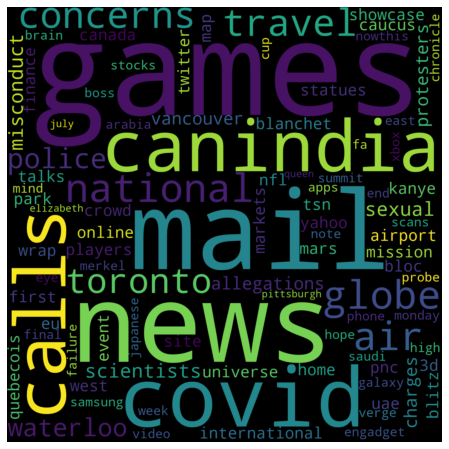

In [213]:
print("Canada trends")
word_gen(can_df)

In [214]:
can_df.head(50)

,trends
0,#covid-19
1,#canindia news calls
2,#national
3,#globe
4,#air travel concerns
5,#toronto police
6,#mail waterloo scientists
7,#sexual misconduct allegations
8,#protesters
9,#charges


US trends


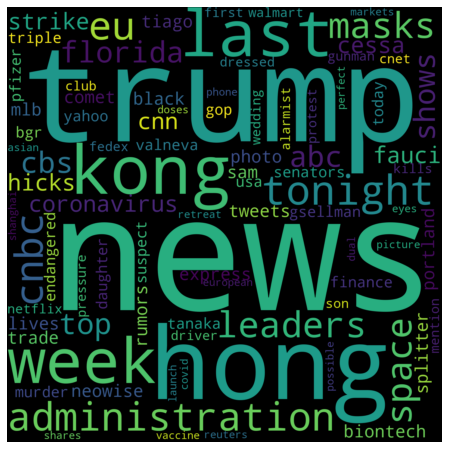

In [215]:
print("US trends")
word_gen(us_df)

Australia trends


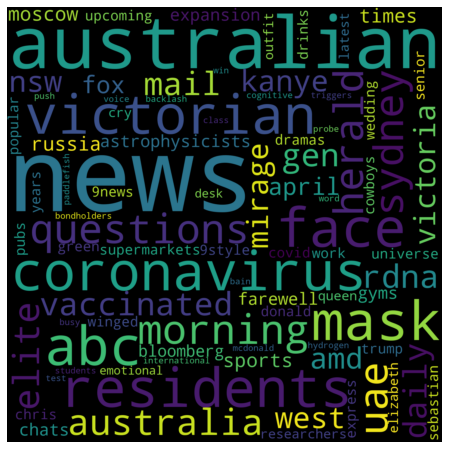

In [216]:
print("Australia trends")
word_gen(aus_df)

India trends


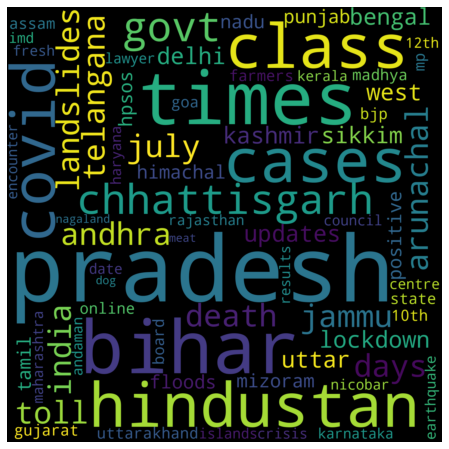

In [217]:
print("India trends")
word_gen(ind_df)

Rajasthan trends


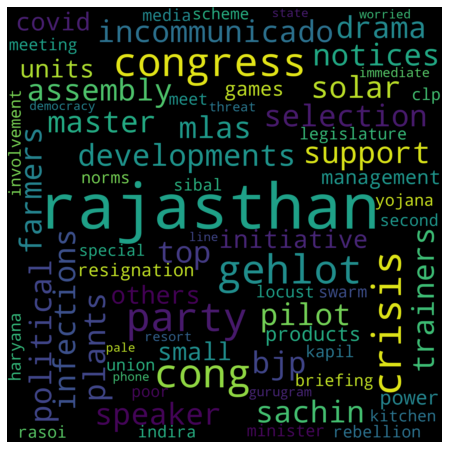

In [218]:
print("Rajasthan trends")
word_gen(raj_df)